In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *   # 引入sqrt(), pi, exp等
import cmath  # 要处理复数情况，用到cmath.exp(), 比np.快
import time
import random

In [2]:
# 有兼并的情况下寻找高对称点上哈密顿量和旋转操作算符共同的本征矢量
def h_r(A,B,f): 
    C = f(A,B)          # 构造产生共同本征矢量并且退兼并的算符矩阵 可以 A*B, A+B
    ABX = np.linalg.eig(C)[1]
    ABX_1 = np.linalg.inv(ABX)
    A_det = np.round(ABX_1.dot(A.dot(ABX)),2)
    B_det = np.round(ABX_1.dot(B.dot(ABX)),2)   
    if (A_det*(np.identity(A_det.shape[0])-1)).any() and \
        (B_det*(np.identity(B_det.shape[0])-1)).any():
        print(A_det, '\n\n', B_det)
        return False
    aa0 = A_det.dot(np.ones(A_det.shape[0]))
    bb0 = B_det.dot(np.ones(B_det.shape[0]))
    aa = np.sort(aa0)
    bb = bb0[np.argsort(aa0)]
    print('\n\nH: ', aa, '\nr: ', bb, '\nr: ', np.round(np.angle(bb)/2/pi*360))

In [3]:
# 画C4能带 M-X-Gamma-M
def plot_bands_two_dimension_C4(hamiltonian):
    dim = hamiltonian(0,0).shape[0]
    kxky = np.arange(0,2+np.sqrt(2),0.02)
    dim_k = kxky.shape[0]
    eigenvalue_k = np.zeros((dim_k,dim))
    for i in range(dim_k):
        xy = kxky[i]
        k1 = (xy<=1) + (xy>1)*(xy<2)*(xy-2) + (xy>=2)*(xy-2)/np.sqrt(2)
        kx = k1*np.pi
        k2 = (xy<=1)*(1-xy) + (xy>=2)*(xy-2)/np.sqrt(2)
        ky = k2*np.pi
        matrix0 = hamiltonian(kx,ky)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)
        eigenvalue_k[i, :] = np.sort(np.real(eigenvalue[:]))
    fig, ax = plt.subplots()
    for dim0 in range(dim):
        ax.plot(kxky, eigenvalue_k[:, dim0], '-k', linewidth = 3)
    ax.set_xticks([0, 1, 2, 2+sqrt(2)])
    ax.set_xticklabels(['M', 'X','Gamma' , 'M'])
    plt.xlim(0, kxky[-1]+0.02)
    plt.grid(axis='x',c='r',linestyle='--')
    plt.show()


# C4哈密顿量(1b)
def hamiltonian(kx, ky):
    p = np.zeros((4,4))*(1+1j)
    p[0,1] = w + v*cmath.exp(-kx*1j)
    p[3,2] = w + v*cmath.exp(-kx*1j)
    p[1,2] = w + v*cmath.exp(-ky*1j)
    p[0,3] = w + v*cmath.exp(-ky*1j)
    p[1,0] = w + v*cmath.exp(kx*1j)
    p[2,3] = w + v*cmath.exp(kx*1j)
    p[2,1] = w + v*cmath.exp(ky*1j)
    p[3,0] = w + v*cmath.exp(ky*1j)
    #基于一维的次近邻项（实际结构中不是次近邻），SSH模型中只有水平垂直项，感觉斜着的项不在模型框架中
    #p[0,0] = p[1,1] = p[2,2] = p[3,3] = 0.25*w*v*(cmath.cos(kx)+cmath.cos(ky))
    return p


# 由矩阵给出从小到大排列的本征值以及按此排列的本征向量
def eig_val_vec(matrix0):
    eigenvalue, eigenvector = np.linalg.eig(matrix0)
    vector = eigenvector[:, np.argsort(np.real(eigenvalue))]
    value = eigenvalue[np.argsort(np.real(eigenvalue))]
    return np.round(value,2), np.round(vector,4)

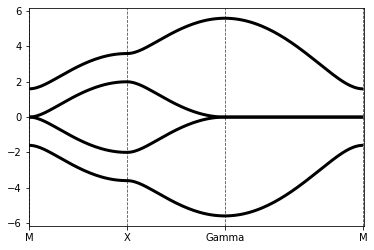

In [4]:
w = 1    # 原胞内相互作用
v = 1.8    # 原胞外相互作用
plot_bands_two_dimension_C4(hamiltonian)

In [15]:
# 2 fold an 4 fold rotation operator

def r41():  
    p = np.zeros((5,5))
    p[1,4] = 1
    p[2,1] = 1
    p[3,2] = 1
    p[4,3] = 1
    p = p[1:,1:]
    return p


def r21():  
    p = np.zeros((5,5))
    p[1,3] = 1
    p[2,4] = 1
    p[3,1] = 1
    p[4,2] = 1
    p = p[1:,1:]
    return p


In [20]:
# 高对称点处能带非兼并情况下看每一个点本征函数对应的旋转操作算符本征值
eig_val_vec(hamiltonian(pi,pi))


(array([-6.+0.j, -0.+0.j,  0.-0.j,  6.-0.j]),
 array([[ 0.5   +0.j, -0.5001-0.j, -0.5001-0.j,  0.5   +0.j],
        [ 0.5   +0.j, -0.4999-0.j,  0.4999+0.j, -0.5   +0.j],
        [ 0.5   -0.j,  0.5001+0.j,  0.5001+0.j,  0.5   -0.j],
        [ 0.5   -0.j,  0.4999+0.j, -0.4999-0.j, -0.5   +0.j]]))

In [30]:
def f(A, B):
    return B
h_r(hamiltonian(pi,pi),r41(),f)



H:  [-6.+0.j  0.+0.j  0.+0.j  6.+0.j] 
r:  [ 1.+0.j  0.+1.j  0.-1.j -1.+0.j] 
r:  [  0.  90. -90. 180.]


In [782]:
# 画C2能带 Gamma-X-M-Y-Gamma
def plot_bands_two_dimension_C2(hamiltonian):
    dim = hamiltonian(0,0).shape[0]
    kxky = np.arange(0,4.001,0.02)
    dim_k = kxky.shape[0]
    eigenvalue_k = np.zeros((dim_k,dim))
    for i in range(dim_k):
        xy = kxky[i]
        k1 = (xy<=1)*xy + (xy>1)*(xy<=2)*1 + (xy>2)*(xy<=3)*(3-xy)
        kx = k1*np.pi
        k2 = (xy>1)*(xy<=2)*(xy-1) + (xy>2)*(xy<=3)*1 + (xy>3)*(4-xy)
        ky = k2*np.pi
        matrix0 = hamiltonian(kx,ky)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)
        eigenvalue_k[i, :] = np.sort(np.real(eigenvalue[:]))
    fig, ax = plt.subplots()
    for dim0 in range(dim):
        ax.plot(kxky, eigenvalue_k[:, dim0], '-k', linewidth = 3)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['Gamma','X','M','Y','Gamma'])
    plt.xlim(0, kxky[-1]+0.02)
    plt.grid(axis='x',c='r',linestyle='--')
    plt.show()


# C2哈密顿量
def hamiltonian(kx, ky):
    p = np.zeros((4,4))*(1+1j)
    p[0,1] = w + vx*cmath.exp(-kx*1j)
    p[3,2] = w + vx*cmath.exp(-kx*1j)
    p[1,2] = w + vy*cmath.exp(-ky*1j)
    p[0,3] = w + vy*cmath.exp(-ky*1j)
    p[1,0] = w + vx*cmath.exp(kx*1j)
    p[2,3] = w + vx*cmath.exp(kx*1j)
    p[2,1] = w + vy*cmath.exp(ky*1j)
    p[3,0] = w + vy*cmath.exp(ky*1j)
    return p

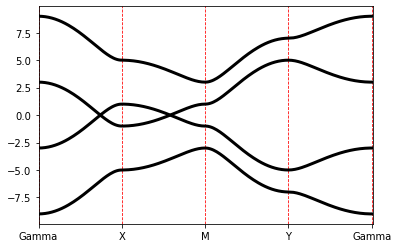

In [739]:
w = 2    # 原胞内相互作用
vx = 4    # x方向原胞外相互作用
vy = 1    # y方向原胞外相互作用
plot_bands_two_dimension_C2(hamiltonian)

In [745]:
def f(A, B):
    return A
h_r(hamiltonian(0,pi),r21(),f)



H:  [-7.+0.j -5.+0.j  5.+0.j  7.+0.j] 
r:  [ 1.+0.j -1.+0.j -1.+0.j  1.+0.j] 
r:  [  0. 180. 180.   0.]


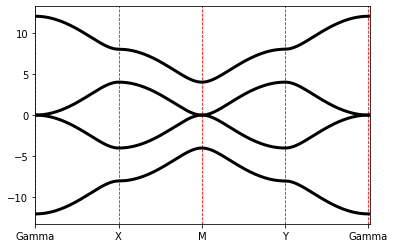

In [770]:
w = 2    # 原胞内相互作用
vx = 4    # x方向原胞外相互作用
vy = 4    # y方向原胞外相互作用
plot_bands_two_dimension_C2(hamiltonian)

In [773]:
def f(A, B):
    return B
h_r(hamiltonian(0,0),r41(),f)



H:  [-12.+0.j   0.+0.j   0.+0.j  12.+0.j] 
r:  [-1.+0.j  0.+1.j  0.-1.j  1.+0.j] 
r:  [180.  90. -90.   0.]


In [762]:
# C4哈密顿量(2b)
def hamiltonian(kx, ky):
    p = np.zeros((4,4))*(1+1j)
    p[0,1] = w
    p[1,2] = w 
    p[2,3] = w 
    p[3,0] = w 
    p[0,2] = v*cmath.exp((-kx-ky)*1j)
    p[1,3] = v*cmath.exp((-kx+ky)*1j)
    p = p +p.conj().T
    return p

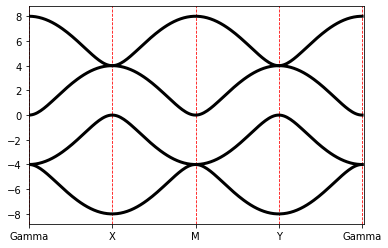

In [763]:
w = 2    # 原胞内相互作用
v = 4
plot_bands_two_dimension_C2(hamiltonian)

In [767]:
def f(A, B):
    return B
h_r(hamiltonian(pi,pi),r41(),f)



H:  [-4.+0.j -4.+0.j  0.+0.j  8.+0.j] 
r:  [ 0.+1.j  0.-1.j -1.+0.j  1.+0.j] 
r:  [ 90. -90. 180.   0.]


In [786]:
# C4哈密顿量
def hamiltonian(kx, ky):
    p = np.zeros((4,4))*(1+1j)
    p[0,2] = w + vx*cmath.exp(-kx*1j)
    p[1,3] = w + vy*cmath.exp(ky*1j)
    p = p +p.conj().T
    return p

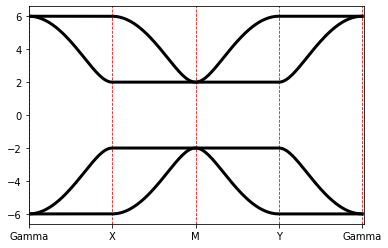

In [788]:
w = 2    # 原胞内相互作用
vx = 4
vy = 4
plot_bands_two_dimension_C2(hamiltonian)

In [797]:
def f(A, B):
    return B
h_r(hamiltonian(0,0),r41(),f)



H:  [-6.+0.j -6.+0.j  6.+0.j  6.+0.j] 
r:  [ 0.+1.j  0.-1.j -1.+0.j  1.+0.j] 
r:  [ 90. -90. 180.   0.]


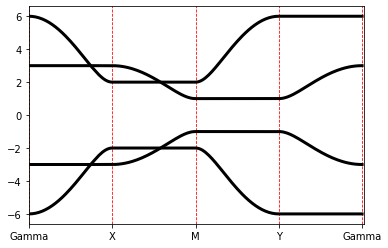

In [798]:
w = 2    # 原胞内相互作用
vx = 4
vy = 1
plot_bands_two_dimension_C2(hamiltonian)

In [805]:
def f(A, B):
    return A
h_r(hamiltonian(0,pi),r21(),f)



H:  [-6.+0.j -1.+0.j  1.+0.j  6.+0.j] 
r:  [-1.+0.j -1.+0.j  1.+0.j  1.+0.j] 
r:  [180. 180.   0.   0.]


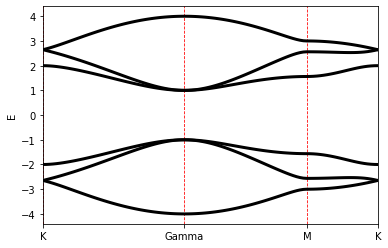

In [692]:
# C6 扩张收缩原子在边上 (3c)
def hamiltonian(kx, ky):    
    h = np.zeros((6, 6))*(1+0j)
    for i in range(6):
        h[i,(i+1)%6] = w
        h[(i+1)%6,i] = w
        h[i,(i-1)%6] = w
        h[(i-1)%6,i] = w          
    h[0,3] = v*(cmath.exp(-1j*kx/2+1j*ky/2*sqrt(3)))
    h[1,4] = v*(cmath.exp(1j*kx/2+1j*ky/2*sqrt(3)))
    h[2,5] = v*(cmath.exp(1j*kx))
    for i in range(3):
        h[i+3,i] = h[i,i+3].conj()
    return h


# 画C6能带
def plot_bands_two_dimension_C6(hamiltonian):
    dim = hamiltonian(0,0).shape[0]
    kxky = np.linspace(0,3+np.sqrt(3),100)
    dim_k = kxky.shape[0]
    eigenvalue_k = np.zeros((dim_k,dim))
    for i in range(dim_k):
        xy = kxky[i]
        k1 = (xy<=2)*(2-xy) + (xy>2)*(xy<2+sqrt(3))*(xy-2)/2*sqrt(3) + (xy>=2+sqrt(3))*(2-(3+sqrt(3)-xy)/2)
        kx = k1*2*pi/3
        k2 = (xy>2)*(xy<2+sqrt(3))*(xy-2)/2 + (xy>=2+sqrt(3))*(3+sqrt(3)-xy)/2*sqrt(3)
        ky = k2*2*pi/3
        matrix0 = hamiltonian(kx,ky)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)
        eigenvalue_k[i, :] = np.sort(np.real(eigenvalue[:]))
    fig, ax = plt.subplots()
    for dim0 in range(dim):
        ax.plot(kxky, eigenvalue_k[:, dim0], '-k', linewidth = 3)
    plt.ylabel('E')
    ax.set_xticks([0, 2, 2+sqrt(3), 3+sqrt(3)])
    ax.set_xticklabels(['K', 'Gamma', 'M', 'K'])
    plt.xlim(0, kxky[-1])
    plt.grid(axis='x',c='r',linestyle='--')
    plt.show()


M = 0
w = 1 
v = 2
plot_bands_two_dimension_C6(hamiltonian)

In [696]:
# 6,3,2 重旋转操作算符

def r61():  
    p = np.zeros((7,7))
    p[1,6] = 1
    p[2,1] = 1
    p[3,2] = 1
    p[4,3] = 1
    p[5,4] = 1
    p[6,5] = 1
    p = p[1:,1:]
    return p


def r31():  
    p = np.zeros((7,7))
    p[2,6] = 1
    p[4,2] = 1
    p[6,4] = 1
    p[3,1] = 1
    p[5,3] = 1
    p[1,5] = 1
    p = p[1:,1:]
    return p


def r21():  
    p = np.zeros((7,7))
    p[2,5] = 1
    p[5,2] = 1
    p[6,3] = 1
    p[3,6] = 1
    p[4,1] = 1
    p[1,4] = 1
    p = p[1:,1:]
    return p


In [693]:
# 定义高对称点的坐标
M_kxky = [0,pi*2/sqrt(3)]
K_kxky = [pi*4/3,0]

In [706]:
def f(A,B):
    return B
#h_r(hamiltonian(*M_kxky),r21(),f)
h_r(hamiltonian(0,0),r61(),f)

[[-4.+0.j -0.+0.j -0.-0.j -0.+0.j -0.-0.j -0.-0.j]
 [ 0.+0.j  1.-0.j -0.+0.j  0.+0.j -0.+0.j -0.+0.j]
 [ 0.+0.j  0.-0.j  1.-0.j -0.+0.j  0.-0.j -0.-0.j]
 [ 0.+0.j  0.-0.j -0.-0.j -1.-0.j  0.-0.j -0.-0.j]
 [ 0.-0.j -0.-0.j  0.+0.j -0.-0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.-0.j  0.+0.j -0.-0.j -0.+0.j  4.+0.j]] 

 [[-1. +0.j   -0. -0.j   -0. +0.j   -0. -0.j   -0. -0.j   -0. -0.j  ]
 [ 0. +0.j   -0.5+0.87j  0. +0.j   -0. -0.j    0. -0.j   -0. +0.j  ]
 [ 0. -0.j    0. -0.j   -0.5-0.87j  0. -0.j   -0. +0.j   -0. -0.j  ]
 [ 0. +0.j   -0. -0.j    0. +0.j    0.5+0.87j  0. +0.j   -0. -0.j  ]
 [ 0. -0.j    0. -0.j    0. +0.j    0. -0.j    0.5-0.87j -0. +0.j  ]
 [ 0. +0.j    0. -0.j    0. +0.j   -0. -0.j   -0. -0.j    1. +0.j  ]]


H:  [-4.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j  4.+0.j] 
r:  [-1. +0.j    0.5+0.87j  0.5-0.87j -0.5+0.87j -0.5-0.87j  1. +0.j  ] 
r:  [ 180.   60.  -60.  120. -120.    0.]


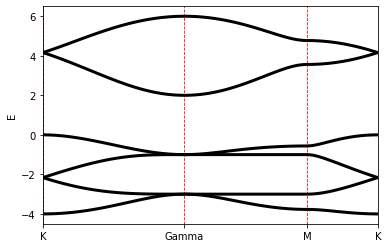

In [711]:
# C6 原子在角上 (4b)
def hamiltonian(kx, ky):     
    h = np.zeros((6, 6))*(1+0j)
    for i in range(6):
        h[i,(i+1)%6] = w      
    h[4,0] = h[3,1] = v*(cmath.exp(-1j*kx/2+1j*ky/2*sqrt(3)))
    h[2,0] = h[3,5] = v*(cmath.exp(1j*kx/2+1j*ky/2*sqrt(3)))
    h[2,4] = h[1,5] = v*(cmath.exp(1j*kx))
    h = h + h.conj().T
    return h


M = 0
w = 1 
v = 2
plot_bands_two_dimension_C6(hamiltonian)

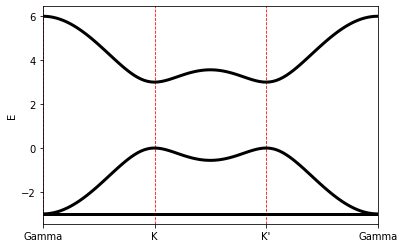

In [6]:
def hamiltonian(kx, ky):    
    h = np.zeros((3, 3))*(1+0j)  
    h[0,1] = w + v*(cmath.exp(1j*kx/2+1j*ky/2*sqrt(3)))
    h[0,2] = w + v*(cmath.exp(-1j*kx/2+1j*ky/2*sqrt(3)))
    h[1,2] = w + v*(cmath.exp(-1j*kx))
    h = h + h.T.conj()
    return h


# 画C3能带
def plot_bands_two_dimension_C3(hamiltonian):
    dim = hamiltonian(0,0).shape[0]
    kxky = np.linspace(0,6,100)
    dim_k = kxky.shape[0]
    eigenvalue_k = np.zeros((dim_k,dim))
    for i in range(dim_k):
        xy = kxky[i]
        k1 = (xy<=2)*xy + (xy>2)*(6-xy)/2
        kx = k1*2*pi/3
        k2 = (xy>2)*(xy<4)*(xy-2)*sqrt(3)/2 + (xy>=4)*(6-xy)/2*sqrt(3)
        ky = k2*2*pi/3
        matrix0 = hamiltonian(kx,ky)
        eigenvalue, eigenvector = np.linalg.eig(matrix0)
        eigenvalue_k[i, :] = np.sort(np.real(eigenvalue[:]))
    fig, ax = plt.subplots()
    for dim0 in range(dim):
        ax.plot(kxky, eigenvalue_k[:, dim0], '-k', linewidth = 3)
    plt.ylabel('E')
    ax.set_xticks([0, 2, 4, 6])
    ax.set_xticklabels([ 'Gamma', 'K', 'K\'', 'Gamma'])
    plt.xlim(0, kxky[-1])
    plt.grid(axis='x',c='r',linestyle='--')
    plt.show()


w = 1 
v = 2
plot_bands_two_dimension_C3(hamiltonian)

In [7]:
def r31():  
    p = np.zeros((4,4))
    p[1,3] = 1
    p[2,1] = 1
    p[3,2] = 1
    p = p[1:,1:]
    return p

In [10]:
def f(A,B):
    return B
#h_r(hamiltonian(*M_kxky),r21(),f)
h_r(hamiltonian(pi*2/3,pi*2/sqrt(3)),r31(),f)



H:  [-3.+0.j  0.+0.j  3.+0.j] 
r:  [-0.5+0.87j  1. +0.j   -0.5-0.87j] 
r:  [ 120.    0. -120.]
